In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [3]:
df = pd.read_csv("telecom.csv")
df

,ID,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,1,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,2,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,3,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,4,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,5,38,0,13773,169,0,44,7,A,Active,30-40,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,33,0,0,0,0,0,0,A,Inactive,Under 30,N,0
3146,3147,37,0,1370,40,24,7,5,A,Inactive,30-40,N,0
3147,3148,34,7,10320,88,3,43,18,A,Active,Over 40,N,0
3148,3149,23,0,1110,27,21,14,7,A,Active,Under 30,N,0


In [4]:
df = df.drop(columns=['ID', 'Tariff plan', 'Status', 'Age group'])
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,N,0
1,28,0,920,32,20,12,7,N,0
2,40,0,88,6,8,6,0,N,1
3,38,0,13963,170,9,47,9,N,0
4,38,0,13773,169,0,44,7,N,0
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,N,0
3146,37,0,1370,40,24,7,5,N,0
3147,34,7,10320,88,3,43,18,N,0
3148,23,0,1110,27,21,14,7,N,0


In [5]:
df['Complaints'] = df['Complaints'].map({'N': 0, 'Y': 1})
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,0,0
1,28,0,920,32,20,12,7,0,0
2,40,0,88,6,8,6,0,0,1
3,38,0,13963,170,9,47,9,0,0
4,38,0,13773,169,0,44,7,0,0
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,0,0
3146,37,0,1370,40,24,7,5,0,0
3147,34,7,10320,88,3,43,18,0,0
3148,23,0,1110,27,21,14,7,0,0


/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


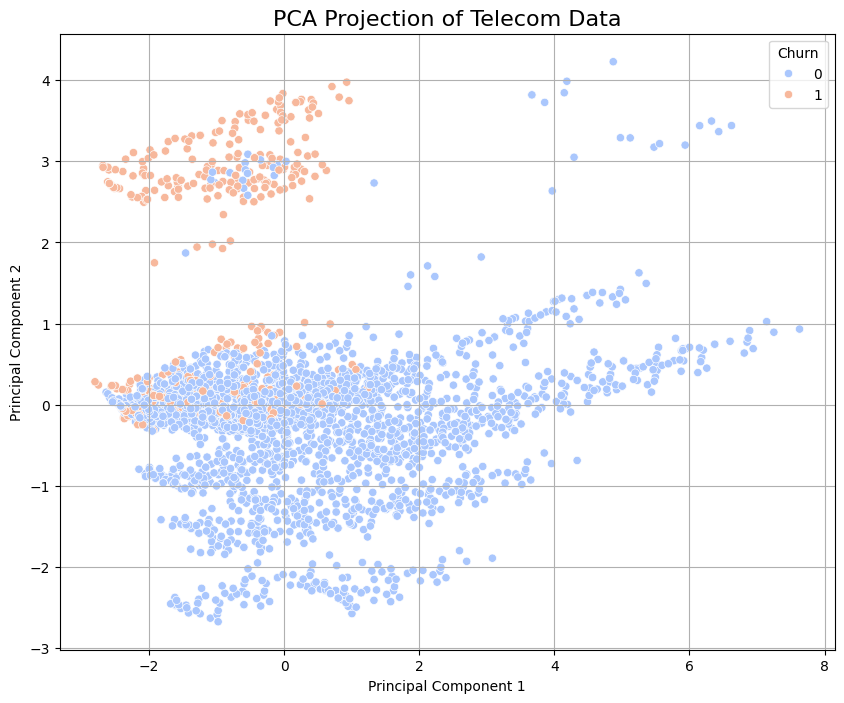

Explained variance by PC1 and PC2: 0.42, 0.15


In [ ]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm")
plt.title("PCA Projection of Telecom Data", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Churn")
plt.grid(True)
plt.show()

explained_var = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_var[0]:.2f}, {explained_var[1]:.2f}")

42% of data captured by PC1 and 15% by PC2 so a total of 57% of data is captured in 2D.